<a href="https://colab.research.google.com/github/hvr2026/Data_preparation-EDA-Visualization/blob/main/Tabular/NYC_Taxi_I_Data_Preprocessing_Cleaning_EDA_AutoEDA_I_Clustering_and_Anomaly_Eliminations_I_AutoML_AutoViML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Step A: Detailed Data Preprocessing and EDA
This section includes a comprehensive analysis of the NYC Taxi dataset, with:
- Visualizations for insights into the data structure and trends.
- Data cleaning and handling missing values.
- Exploratory Data Analysis (EDA) using both manual and automated methods (e.g., AutoEDA tools).

In [1]:

# Install necessary libraries for AutoEDA
!pip install pandas-profiling dataprep




In [2]:
# Import necessary libraries
from sklearn.ensemble import IsolationForest

In [3]:
# Import libraries for AutoEDA
from dataprep.eda import create_report
import pandas as pd

In [4]:

data = pd.read_csv("/content/yellow_tripdata_2016.csv")

# Perform initial checks to confirm the dataset is loaded
print("Dataset loaded successfully.")
print(f"Dataset shape: {data.shape}")
print("First few rows of the dataset:")
print(data.head())




Dataset loaded successfully.
Dataset shape: (51345, 19)
First few rows of the dataset:
   VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         1        3/1/2016 0:00         3/1/2016 0:07                1   
1         1        3/1/2016 0:00         3/1/2016 0:11                1   
2         2        3/1/2016 0:00         3/1/2016 0:31                2   
3         2        3/1/2016 0:00         3/1/2016 0:00                3   
4         2        3/1/2016 0:00         3/1/2016 0:00                5   

   trip_distance  pickup_longitude  pickup_latitude  RatecodeID  \
0           2.50        -73.976746        40.765152           1   
1           2.90        -73.983482        40.767925           1   
2          19.98        -73.782021        40.644810           1   
3          10.78        -73.863419        40.769814           1   
4          30.43        -73.971741        40.792183           3   

  store_and_fwd_flag  dropoff_longitude  dropoff_latitude  

In [5]:

# AutoEDA using DataPrep
from dataprep.eda import create_report

# Generate the DataPrep report
dataprep_report = create_report(data)
dataprep_report.show_browser()



Computing series-groupby-sum-chunk-945db80a5bac3aa23ba3c739b5ff88eb-f89c135150342b8c6ed8cc83670d3378:  83%|████████▎ | 2219/2680 [00:02<00:00, 831.47it/s]/usr/local/lib/python3.10/dist-packages/dask/core.py:127: RuntimeWarning: invalid value encountered in divide
  return func(*(_execute_task(a, cache) for a in args))
/usr/local/lib/python3.10/dist-packages/dataprep/eda/distribution/render.py:274: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame({col: [nrows - npresent]}, index=["Others"]))
/usr/local/lib/python3.10/dist-packages/dataprep/eda/distribution/render.py:274: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame({col: [nrows - npresent]}, index=["Others"]))


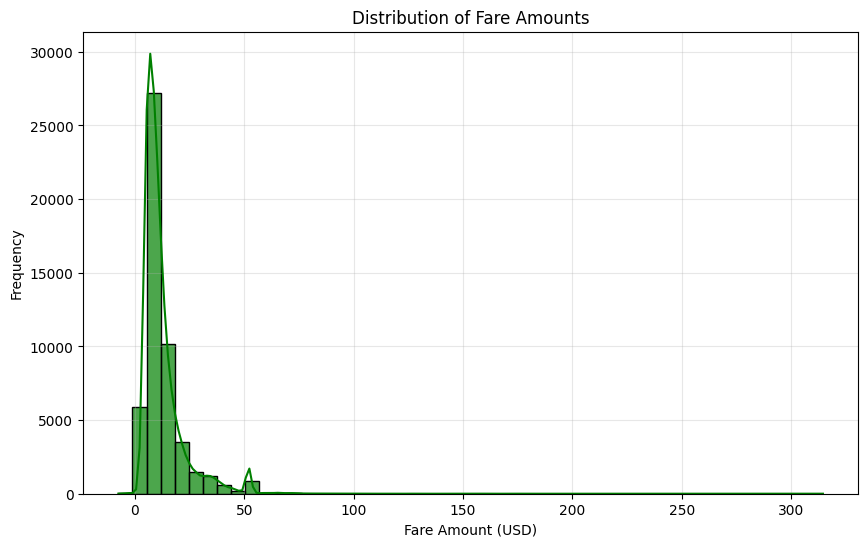

In [6]:
# Additional manual EDA visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of fare amounts
plt.figure(figsize=(10, 6))
sns.histplot(data['fare_amount'], bins=50, kde=True, color='green', alpha=0.7)
plt.title('Distribution of Fare Amounts')
plt.xlabel('Fare Amount (USD)')
plt.ylabel('Frequency')
plt.grid(alpha=0.3)
plt.show()



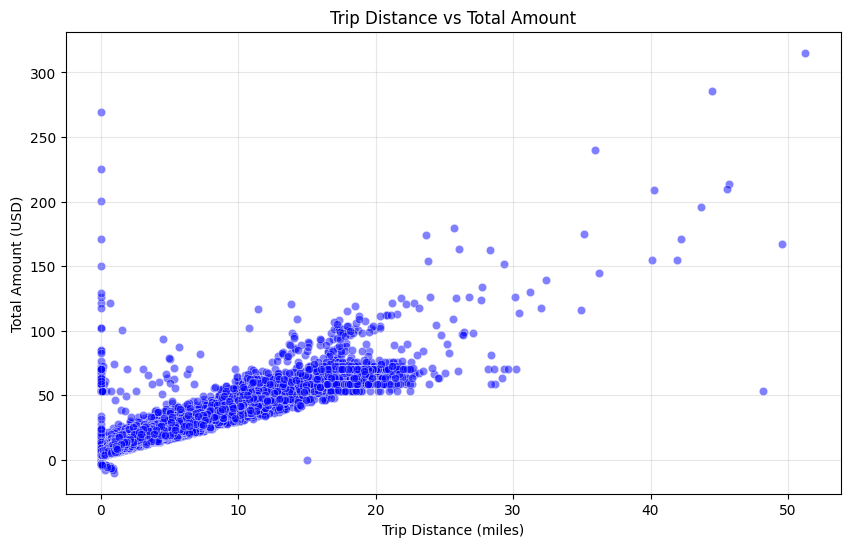

Manual EDA visualizations completed.


In [7]:
# Trip Distance vs. Total Amount scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['trip_distance'], y=data['total_amount'], alpha=0.5, color='blue')
plt.title('Trip Distance vs Total Amount')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Total Amount (USD)')
plt.grid(alpha=0.3)
plt.show()

print("Manual EDA visualizations completed.")


# Step B: Clustering and Anomaly Detection
This section covers:
- Identification and elimination of anomalies using clustering techniques.
- Imputation of missing values where necessary.
- Feature engineering and selection processes.


In [8]:

# Import necessary libraries for clustering and anomaly detection
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns



In [9]:
# Ensure numerical data for clustering
print("Preparing data for clustering...")
clustering_features = data[['trip_distance', 'total_amount']].dropna()
print(f"Clustering dataset shape: {clustering_features.shape}")



Preparing data for clustering...
Clustering dataset shape: (51345, 2)


In [10]:
# Scale the data for clustering
scaler = StandardScaler()
scaled_features = scaler.fit_transform(clustering_features)
print("Data scaling completed.")



Data scaling completed.


In [11]:
# Apply KMeans for clustering
kmeans = KMeans(n_clusters=3, random_state=42)
cluster_labels = kmeans.fit_predict(scaled_features)
print("KMeans clustering completed.")


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans clustering completed.


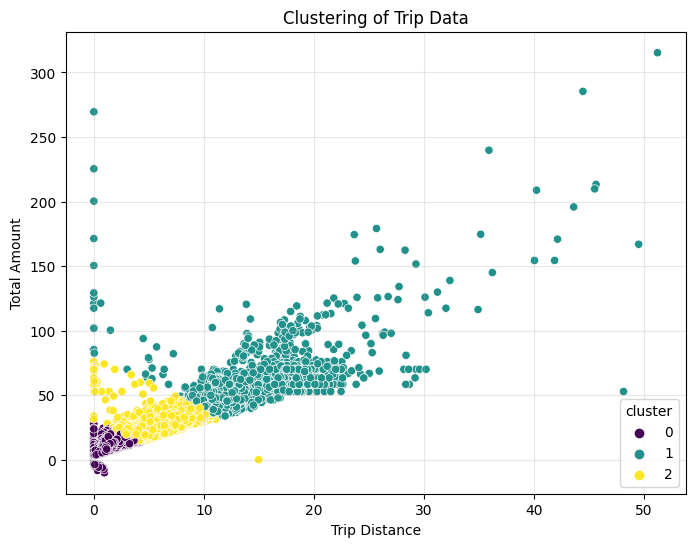

In [12]:

# Add clusters back to the data
data['cluster'] = cluster_labels

# Visualize clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data['trip_distance'], y=data['total_amount'], hue=data['cluster'], palette='viridis')
plt.title('Clustering of Trip Data')
plt.xlabel('Trip Distance')
plt.ylabel('Total Amount')
plt.grid(alpha=0.3)
plt.show()



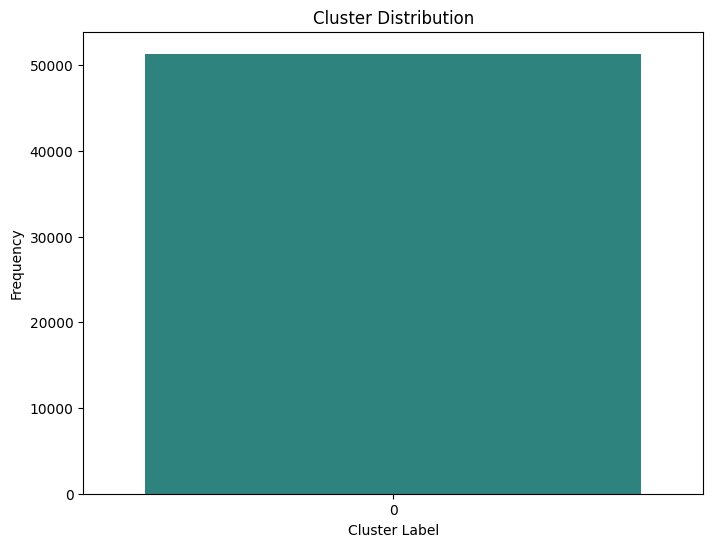

In [13]:
# Visualize cluster distribution
plt.figure(figsize=(8, 6))
sns.countplot(data['cluster'], palette='viridis')
plt.title('Cluster Distribution')
plt.xlabel('Cluster Label')
plt.ylabel('Frequency')
plt.show()


In [14]:
# Select numerical features for anomaly detection
anomaly_features = data[['trip_distance', 'total_amount']].dropna()

In [15]:
# Apply Isolation Forest
print("Fitting Isolation Forest for anomaly detection...")
iso_forest = IsolationForest(contamination=0.05, random_state=42)
data['anomaly'] = iso_forest.fit_predict(anomaly_features)

Fitting Isolation Forest for anomaly detection...


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


In [16]:
# Map the anomalies (1 = normal, -1 = anomaly)
data['anomaly'] = data['anomaly'].map({1: 'normal', -1: 'anomaly'})
print(f"Anomalies detected: {data['anomaly'].value_counts()}")

Anomalies detected: normal     48777
anomaly     2568
Name: anomaly, dtype: int64


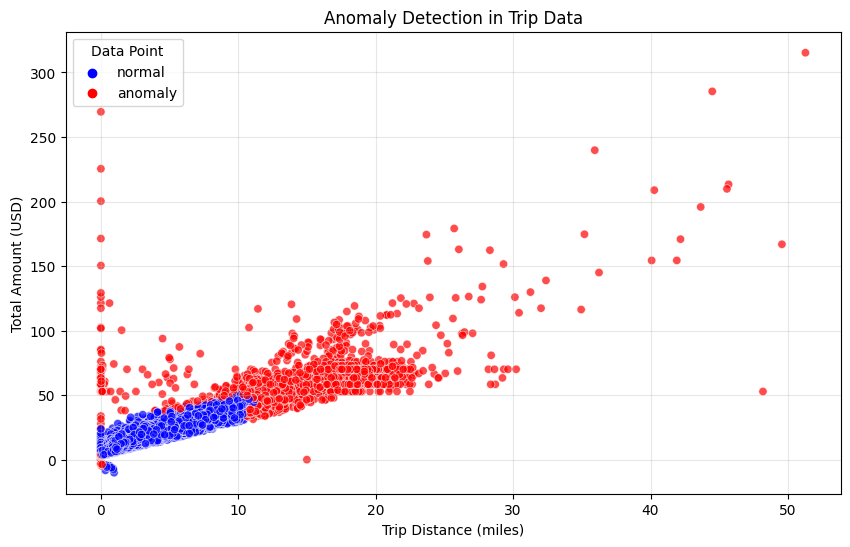

In [17]:
# Visualize anomalies in trip distance vs. total amount
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=data['trip_distance'],
    y=data['total_amount'],
    hue=data['anomaly'],
    palette={'normal': 'blue', 'anomaly': 'red'},
    alpha=0.7
)
plt.title('Anomaly Detection in Trip Data')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Total Amount (USD)')
plt.grid(alpha=0.3)
plt.legend(title='Data Point')
plt.show()

In [18]:
# Remove anomalies for further analysis
cleaned_data = data[data['anomaly'] == 'normal'].copy()
print(f"Cleaned dataset shape after anomaly removal: {cleaned_data.shape}")

Cleaned dataset shape after anomaly removal: (48777, 21)



# Step C: Machine Learning Modeling with AutoML
This section demonstrates:
- Building ML models using AutoML libraries like AutoVIML.
- Training and evaluation of ensemble models.


In [19]:

# Install AutoVIML for AutoML
!pip install autoviml




  Using cached matplotlib-3.9.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (11 kB)
Using cached matplotlib-3.9.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (8.3 MB)
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.7.3
    Uninstalling matplotlib-3.7.3:
      Successfully uninstalled matplotlib-3.7.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
mlxtend 0.23.2 requires scikit-learn>=1.3.1, but you have scikit-learn 1.2.2 which is incompatible.
plotnine 0.14.1 requires pandas>=2.2.0, but you have pandas 1.5.3 which is incompatible.
ydata-profiling 4.6.0 requires matplotlib<=3.7.3,>=3.2, but you have matplotlib 3.9.2 which is incompatible.


In [23]:
# Import AutoVIML
from autoviml.Auto_ViML import Auto_ViML

# Use cleaned data after anomaly removal

auto_data = cleaned_data




Starting AutoML with AutoVIML...
##############  D A T A   S E T  A N A L Y S I S  #######################
ALERT! Changing hyperparameter search to RS. Otherwise, Random Forests will take too long for 10,000+ rows
Training Set Shape = (48777, 21)
    Training Set Memory Usage = 8.00 MB
Single_Label Target: ['total_amount']

################ Regression VISUALIZATION Started #####################
No shuffling of data set before training...
    Using RandomizedSearchCV for Hyper Parameter Tuning. This is 3X faster than GridSearchCV...
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    Number of Numeric Columns =  10
    Number of Integer-Categorical Columns =  4
    Number of String-Categorical Columns =  0
    Number of Factor-Categorical

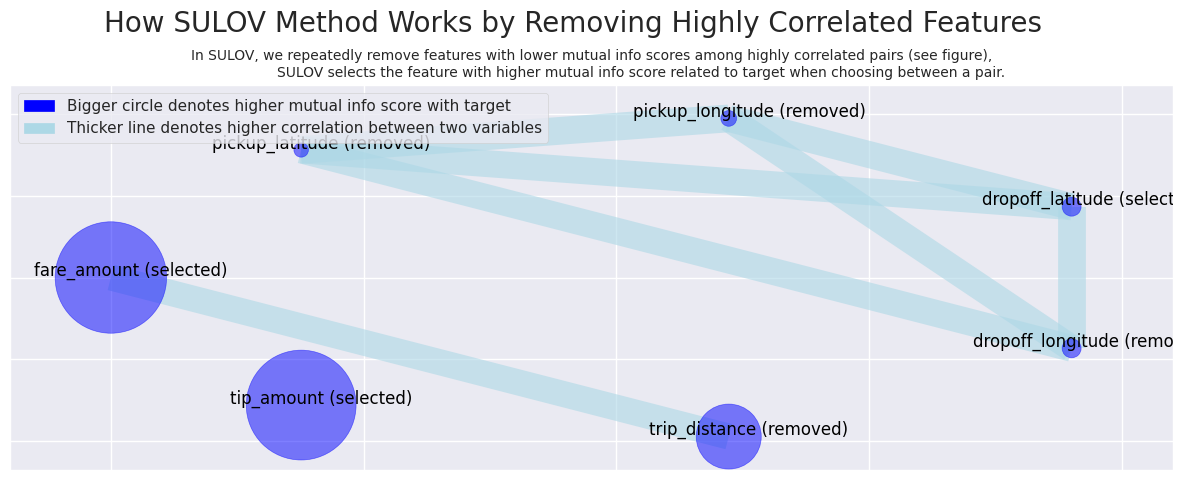

Splitting selected features into float and categorical (integer) variables:
    (6) float variables ...
    (8) categorical vars...
###############################################################################
#######     F E A T U R E   S E L E C T I O N    BY   X G B O O S T    ########
###############################################################################
Current number of predictors = 14 
    Finding Important Features using Boosted Trees algorithm...
        using 14 variables...
        using 11 variables...
        using 8 variables...
        using 5 variables...
        using 2 variables...
Found 12 important features
    Performing limited feature engineering for binning, add_poly and KMeans_Featurizer flags  ...
    Train CV Split completed with TRAIN rows =  39021 , CV rows =  9756
    Binning_Flag set to False or there are no float vars in data set to be binned
    KMeans_Featurizer set to False or there are no float variables in data
Performing MinMax scaling o

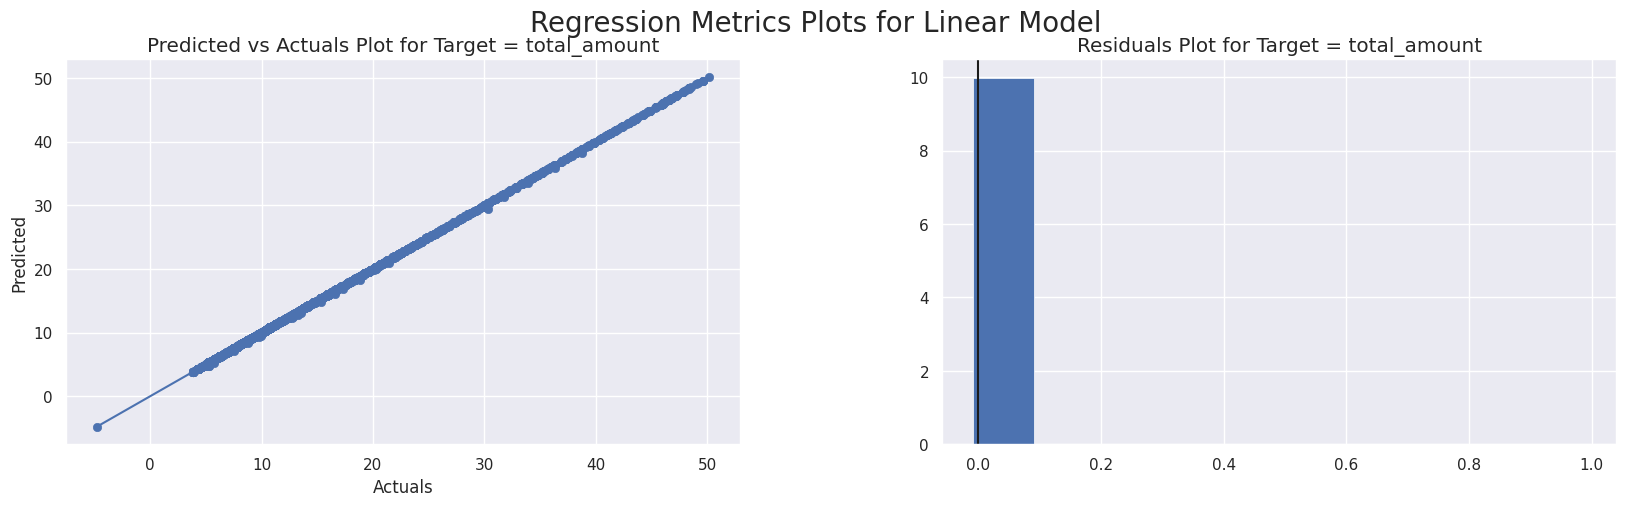

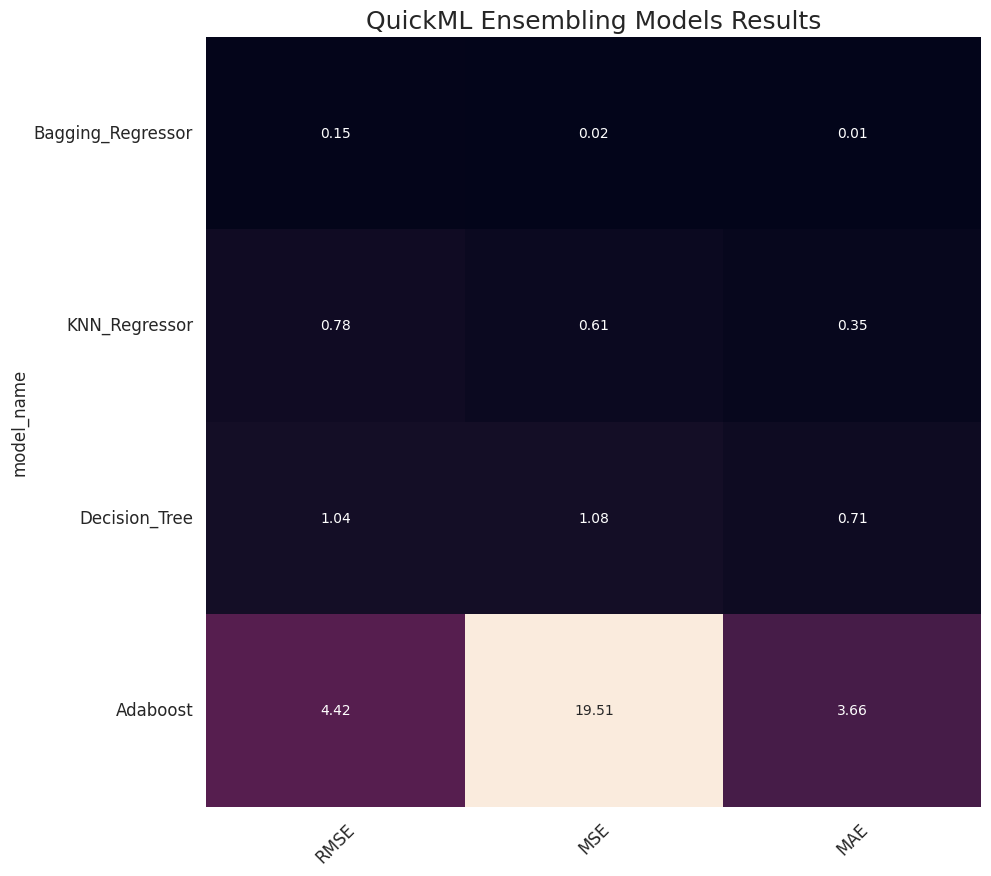

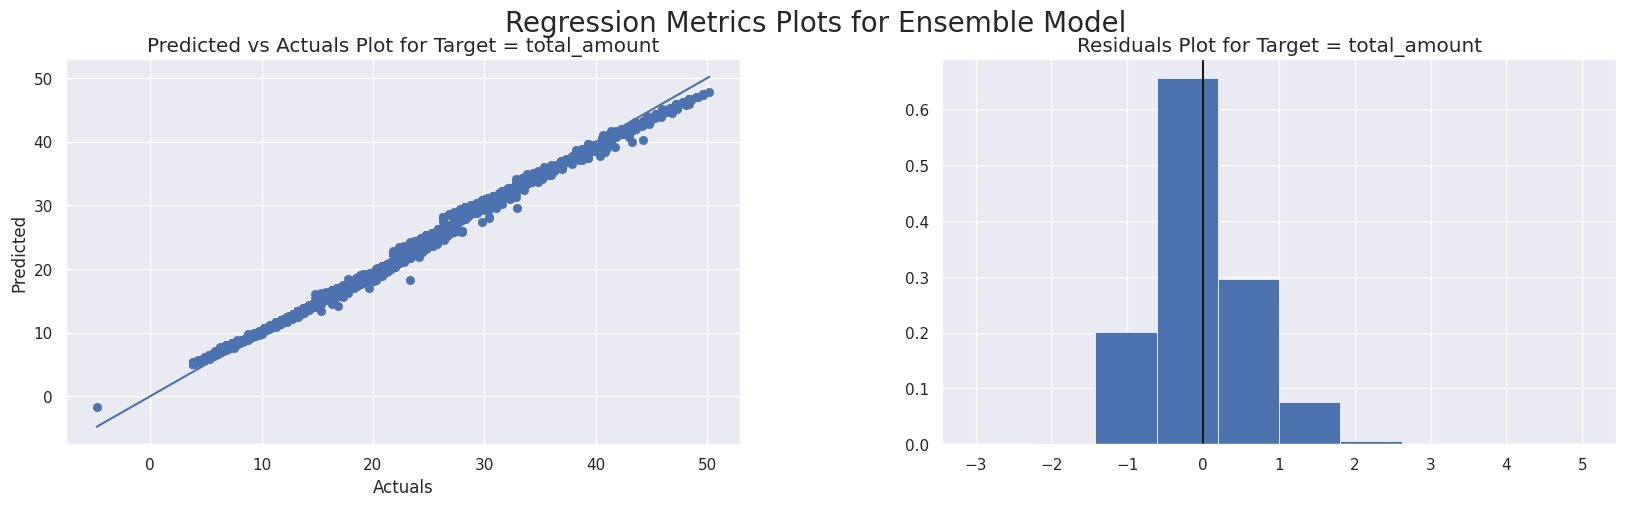

<Figure size 1500x500 with 0 Axes>

In [24]:
# Define target and features
try:
    target = 'total_amount'  # Define the target variable
    features = auto_data.drop(columns=[target], errors='ignore')  # Remove target column

    # Train AutoVIML model
    print("Starting AutoML with AutoVIML...")
    model, features, train, test = Auto_ViML(
        train=auto_data,
        target=target,
        test='',  # Empty test data for AutoVIML to split automatically
        hyper_param='RS',  # Random search for hyperparameter tuning
        scoring_parameter='r2',  # Use R-squared as the scoring metric
        KMeans_Featurizer=False,
        verbose=1
    )

    print("AutoML model training completed.")
    print(f"Model Summary: {model}")

except Exception as e:
    print(f"Error during AutoML execution: {e}")